In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
df = pd.read_csv('BP sample.csv')
df = df.drop(['Pt','Unnamed: 8'],axis = 1)
df

,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,105,47,85.4,1.75,5.1,63,33
1,115,49,94.2,2.10,3.8,70,14
2,116,49,95.3,1.98,8.2,72,10
3,117,50,94.7,2.01,5.8,73,99
4,112,51,89.4,1.89,7.0,72,95
5,121,48,99.5,2.25,9.3,71,10
6,121,49,99.8,2.25,2.5,69,42
7,110,47,90.9,1.90,6.2,66,8
8,110,49,89.2,1.83,7.1,69,62
9,114,48,92.7,2.07,5.6,64,35


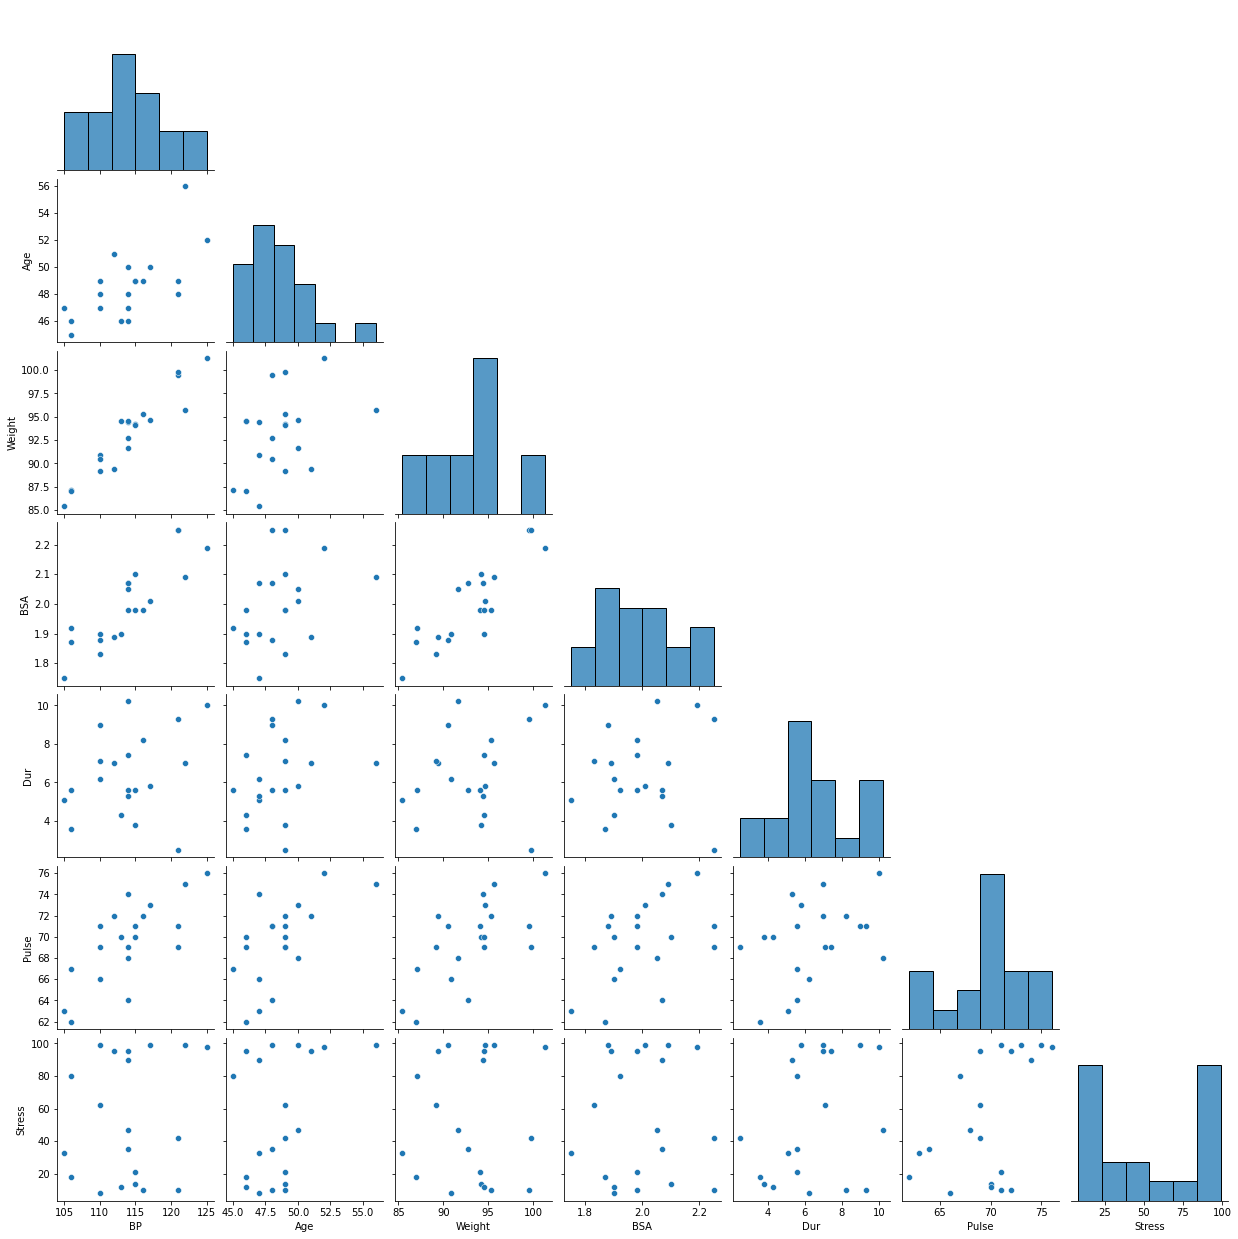

In [3]:
import seaborn as sns
sns.pairplot(df, corner=True)

In [4]:
df.corr()["BP"]

BP        1.000000
Age       0.659093
Weight    0.950068
BSA       0.865879
Dur       0.292834
Pulse     0.721413
Stress    0.163901
Name: BP, dtype: float64

In [5]:
df.corr()

,BP,Age,Weight,BSA,Dur,Pulse,Stress
BP,1.000000,0.659093,0.950068,0.865879,0.292834,0.721413,0.163901
Age,0.659093,1.000000,0.407349,0.378455,0.343792,0.618764,0.368224
Weight,0.950068,0.407349,1.000000,0.875305,0.200650,0.659340,0.034355
BSA,0.865879,0.378455,0.875305,1.000000,0.130540,0.464819,0.018446
Dur,0.292834,0.343792,0.200650,0.130540,1.000000,0.401514,0.311640
Pulse,0.721413,0.618764,0.659340,0.464819,0.401514,1.000000,0.506310
Stress,0.163901,0.368224,0.034355,0.018446,0.311640,0.506310,1.000000


In [ ]:
# def calculate_vif(df, features):    
#     vif, tolerance = {}, {}
#     # all the features that you want to examine
#     for feature in features:
#         # extract all the other features you will regress against
#         X = [f for f in features if f != feature]        
#         X, y = df[X], df[feature]
#         # extract r-squared from the fit
#         r2 = LinearRegression().fit(X, y).score(X, y)                
        
#         # calculate tolerance
#         tolerance[feature] = 1 - r2
#         # calculate VIF
#         vif[feature] = 1/(tolerance[feature])
#     # return VIF DataFrame
#     return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [6]:
def calculate_vif(df, features):    
    vif = {}
    # all the features that you want to examine
    for feature in features: # feature = Age
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate VIF
        vif[feature] = 1/(1 - r2)
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif})

In [7]:
calculate_vif(df=df, features=['Age','Weight','BSA','Pulse'])

,VIF
Age,1.731378
BSA,5.051235
Pulse,2.817197
Weight,6.885801


## Interpreting VIF Values
    The valid value for VIF ranges from 1 to infinity. A rule of thumb for interpreting VIF values is:
        * 1 — features are not correlated
        * 1<VIF<5 — features are moderately correlated
        * VIF>5 — features are highly correlated
        * VIF>10 — high correlation between features and is cause for concern
    
    From the result calculating the VIF in the previous section, you can see the Weight and BSA have VIF values greater than 5. This means that Weight and BSA are highly correlated. This is not surprising as heavier people have a larger body surface area.
    
    So the next thing to do would be to try removing one of the highly correlated features and see if the result for VIF improves. Let’s try removing Weight since it has a higher VIF:

In [8]:
calculate_vif(df=df, features=['Age','BSA','Pulse'])

,VIF
Age,1.648521
BSA,1.297738
Pulse,1.801669


Let’s now remove BSA and see the VIF of the other features:

In [9]:
calculate_vif(df=df, features=['Age','Weight','Pulse'])

,VIF
Age,1.620404
Pulse,2.390933
Weight,1.769065


As you observed, removing Weight results in a lower VIF for all other features, compared to removing BSA. So should you remove Weight then? Well, ideally, yes. But for practical reasons, it would make more sense to remove BSA and keep Weight. This is because later on when the model is trained and you use it for prediction, it is easier to get a patient’s weight than his/her body surface area.`